# League Tables

League tables compile the current results of games played in a league.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('default')

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

In [3]:
colors = {
    # https://teamcolorcodes.com/soccer/premier-league-color-codes/
    'ARS': '#EF0107',
    'AVL': '#95bfe5',
    'BHA': '#0057B8',
    'BRE': '#DA291C',
    'BUR': '#6C1D45',
    'CHE': '#034694',
    'CRY': '#1B458F',
    'EVE': '#003399',
    'LEI': '#003090',
    'LEE': '#FFCD00',
    'LIV': '#c8102E',
    'MCI': '#6CABDD',
    'MUN': '#DA291C',
    'NOR': '#FFF200',
    'NEW': '#241F20',
    'SOU': '#d71920',
    'TOT': '#132257',
    'WAT': '#FBEE23',
    'WHU': '#7A263A',
    'WOL': '#FDB913'
}

In [4]:
logos = {
    # https://www.transfermarkt.com/premier-league/transfers/wettbewerb/GB1
    'Arsenal': '../data/logos/ARS.png',
    'Aston Villa': '../data/logos/AVL.png',
    'Brighton and Hove Albion': '../data/logos/BHA.png',
    'Brentford': '../data/logos/BRE.png',
    'Burnley': '../data/logos/BUR.png',
    'Chelsea': '../data/logos/CHE.png',
    'Crystal Palace': '../data/logos/CRY.png',
    'Everton': '../data/logos/EVE.png',
    'Leicester City': '../data/logos/LEI.png',
    'Leeds United': '../data/logos/LEE.png',
    'Liverpool': '../data/logos/LIV.png',
    'Manchester City': '../data/logos/MCI.png',
    'Manchester United': '../data/logos/MUN.png',
    'Norwich City': '../data/logos/NOR.png',
    'Newcastle': '../data/logos/NEW.png',
    'Southampton': '../data/logos/SOU.png',
    'Tottenham Hotspur': '../data/logos/TOT.png',
    'Watford': '../data/logos/WAT.png',
    'West Ham United': '../data/logos/WHU.png',
    'Wolverhampton': '../data/logos/WOL.png',
}

In [5]:
fixtures = pd.read_csv(
    '../data/fpl_official/vaastav/data/2021-22/fixtures.csv')

league_table = pd.read_csv(
    '../data/fpl_official/vaastav/data/2021-22/teams.csv'
    )[['id', 'name', 'short_name']]

In [6]:
league_table = league_table.replace({
    'Brighton': 'Brighton and Hove Albion',
    'Leicester': 'Leicester City',
    'Leeds': 'Leeds United',
    'Man City': 'Manchester City',
    'Man Utd': 'Manchester United',
    'Norwich': 'Norwich City',
    'Spurs': 'Tottenham Hotspur',
    'West Ham': 'West Ham United',
    'Wolves': 'Wolverhampton'
})

## League Table

In [7]:
from LeagueTables import LeagueTables

league_tables = LeagueTables(fixtures, league_table)
league_tables.lt()
league_tables.league_table.sort_values(by=['points'], ascending=False)

,id,name,short_name,points
11,12,Manchester City,MCI,93
10,11,Liverpool,LIV,92
5,6,Chelsea,CHE,74
16,17,Tottenham Hotspur,TOT,71
0,1,Arsenal,ARS,69
12,13,Manchester United,MUN,58
18,19,West Ham United,WHU,56
8,9,Leicester City,LEI,52
3,4,Brighton and Hove Albion,BHA,51
19,20,Wolverhampton,WOL,51


In [8]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [9]:
Path = mpath.Path

def bezier_path(p1, p2, color):
    x1, y1 = p1
    x2, y2 = p2

    if y2 != y1:
        path_data = [
            (Path.MOVETO, (x1, y1)),
            (Path.CURVE3, (x1+(x2-x1)/2, y1)),
            (Path.CURVE3, (x1+(x2-x1)/2, y1+(y2-y1)/2)),
            (Path.CURVE3, (x1+(x2-x1)/2, y2)),
            (Path.CURVE3, (x2, y2)),
            ]
        codes, verts = zip(*path_data)
        path = mpath.Path(verts, codes)
        patch = mpatches.PathPatch(path, ec=color, fc='none', zorder=2)

    else:
        path_data = [
            (Path.MOVETO, (x1, y1)),
            (Path.LINETO, (x2, y2)),
            ]
        codes, verts = zip(*path_data)
        path = mpath.Path(verts, codes)
        patch = mpatches.PathPatch(path, ec=color, fc='none', zorder=2)

    return patch

In [10]:
def imscatter(x, y, image, ax=None, zoom=1):
    """stackoverflow.com/questions/35651932/plotting-img-with-matplotlib/35651933"""
    if ax is None:
        ax = plt.gca()

    try:
        image = plt.imread(image)
    except TypeError:
        pass

    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
        
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [11]:
season_table = league_tables.per_gw_lt()

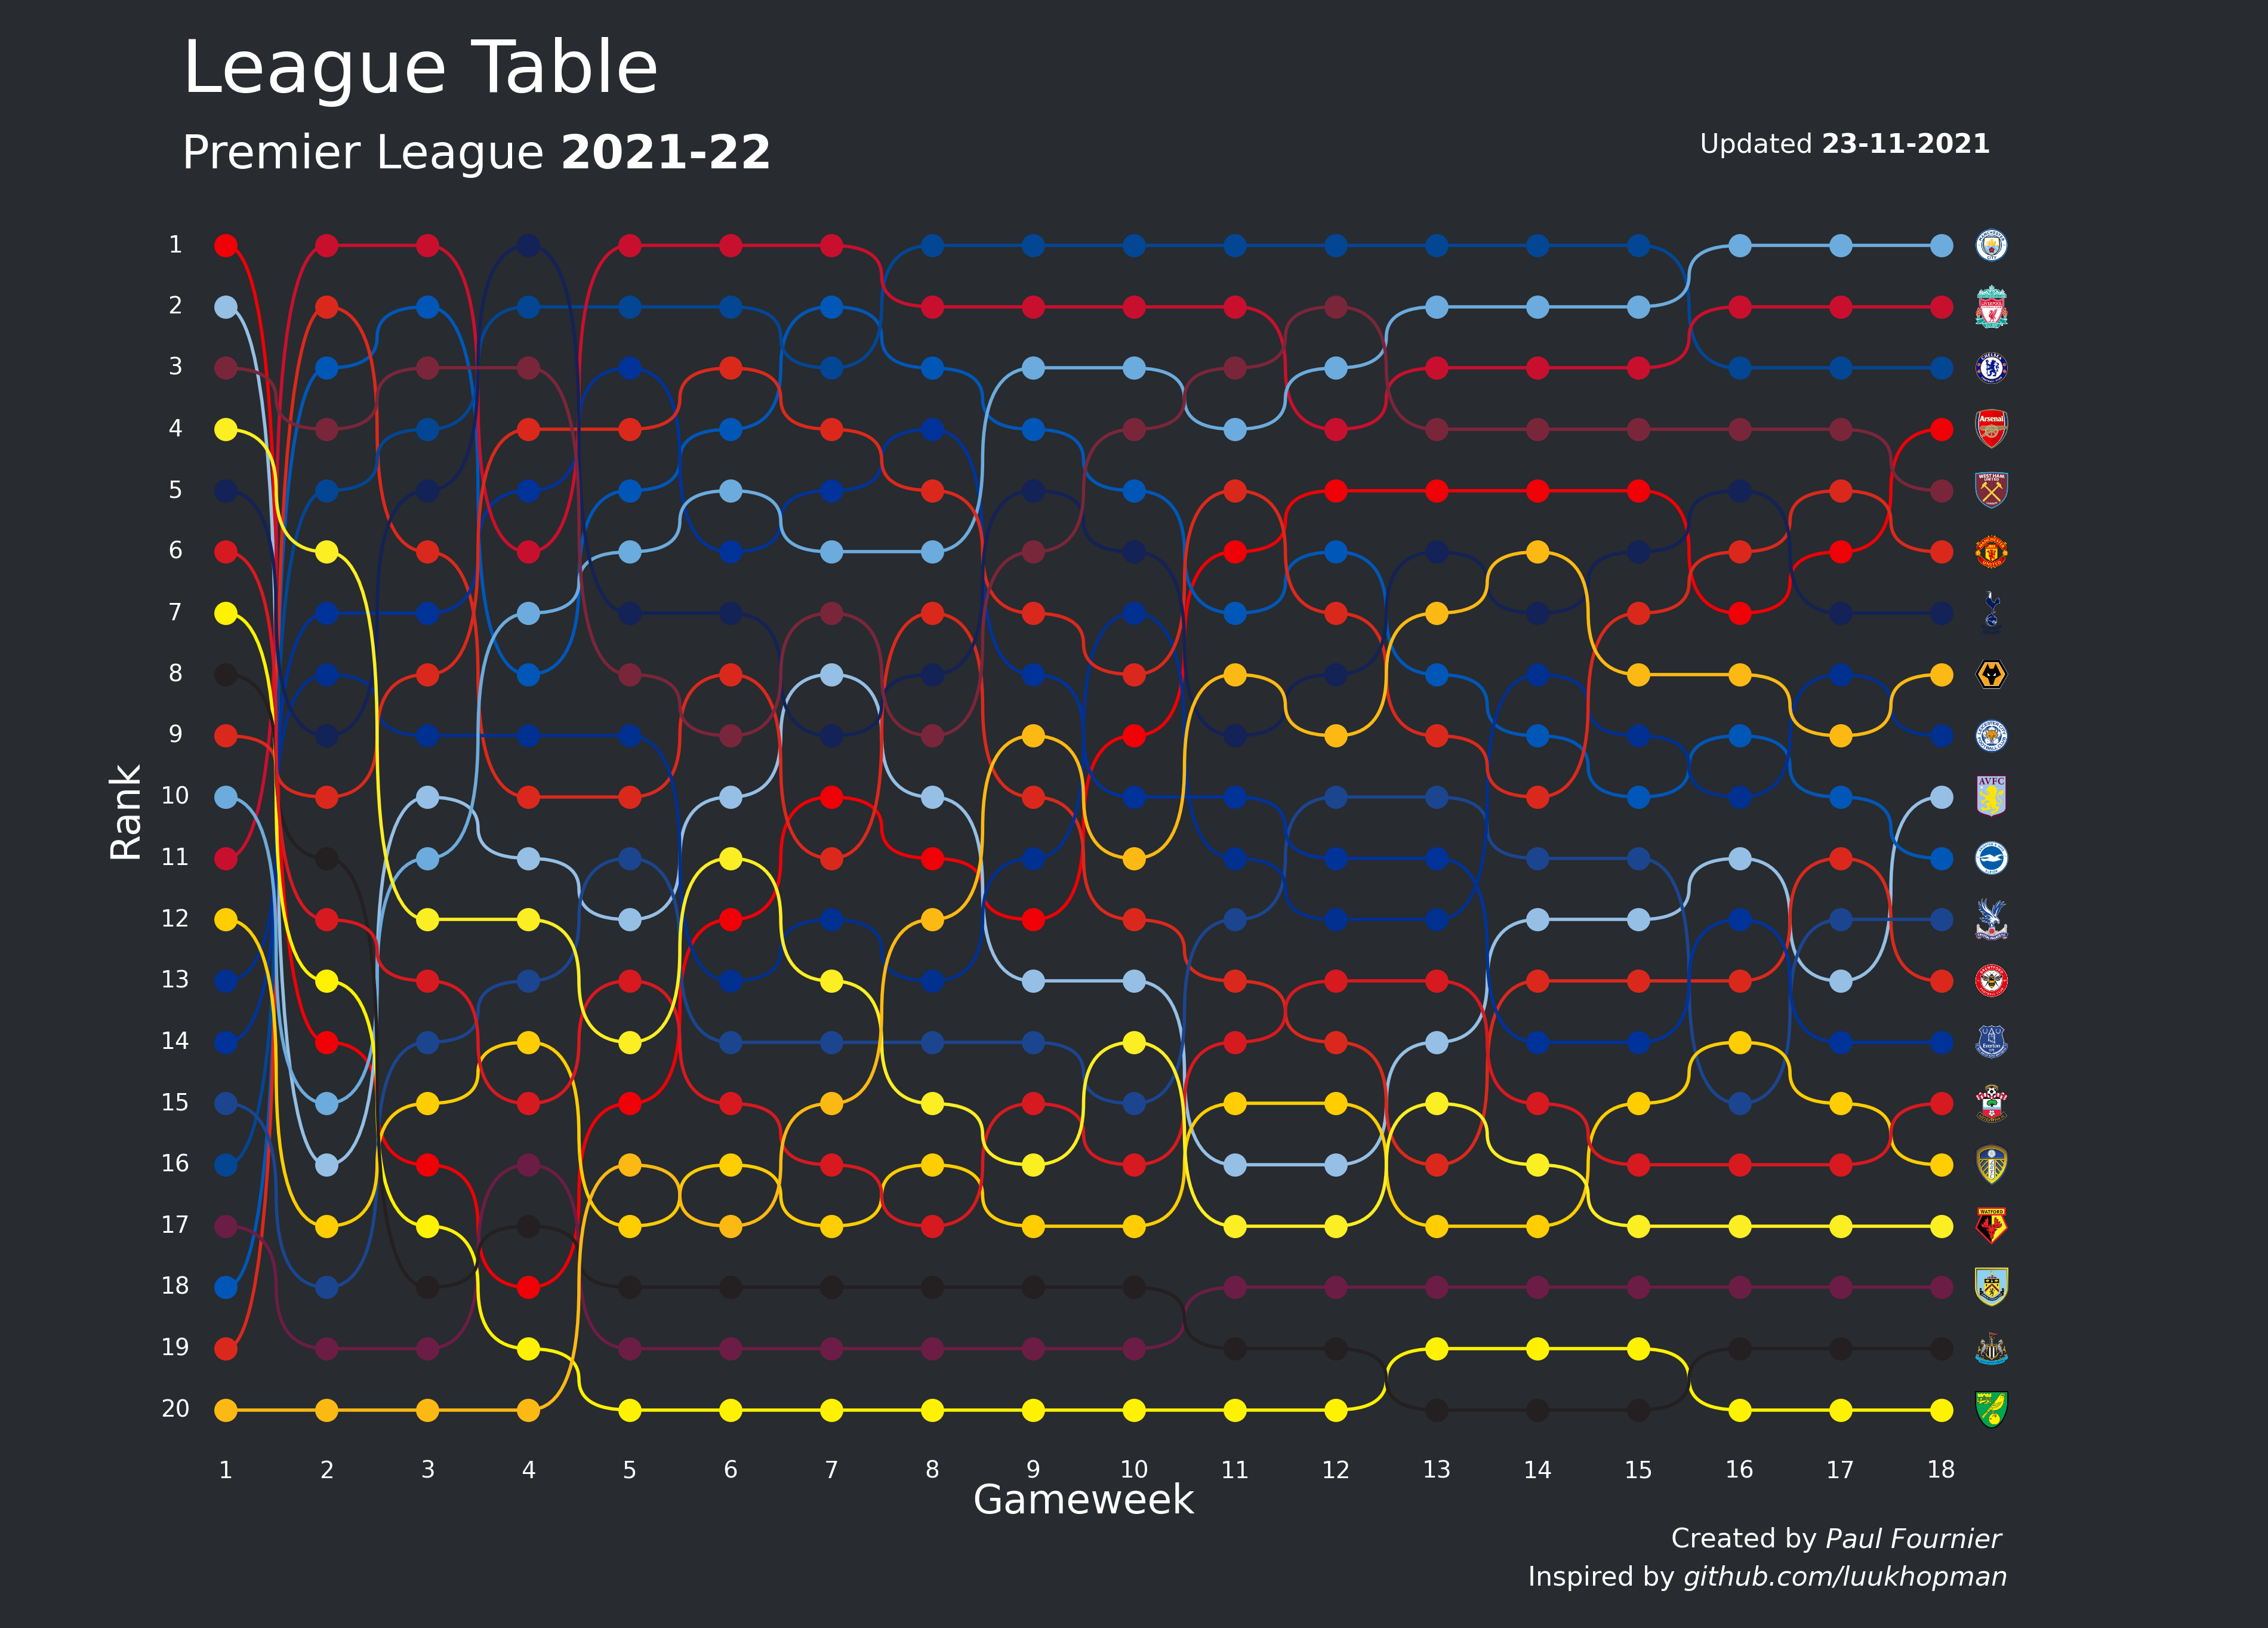

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

for team_name, color, img_path in zip(
        colors.keys(), colors.values(), logos.values()):
    indices = season_table[season_table == team_name].stack().index.tolist()
    coords = [(int(idx[1]), idx[0]) for idx in indices]
    coords = sorted(coords, key=lambda x: x[0])

    # Plot the dot with the team's color
    for idx in indices:
        ax.scatter(int(idx[1]), idx[0], fc=color, zorder=1)

    # Plot the lines
    for p1, p2 in zip(coords[:-1], coords[1:]):
        patch = bezier_path(p1, p2, color)
        ax.add_patch(patch)

    # Plot the team logo
    imscatter(x=17.5, y=coords[-1][-1], image = img_path, ax=ax, zoom=0.1)

ax.set_axis_off()
ax.set(xlim=(-2,20), ylim=(-2,22))
fig_text(
    x=.18, y=.925,
    s="League Table",
    fontsize=22, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=.18, y=.875,
    s="Premier League <2021-22>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=14, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.71, y=.875,
    s="Updated <23-11-2021>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=8, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.7, y=.145,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=8, fontfamily=watermark_font, color=text_color)
fig_text(
    x=0.65, y=.125,
    s="Inspired by <github.com/luukhopman>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=8, fontfamily=watermark_font, color=text_color)

ax.text(8.5, 20.5, 'Gameweek', fontsize=12, va='center', ha='center')
ax.text(-1, 10, 'Rank', rotation=90, fontsize=12, va='bottom', ha='center')

[
    ax.text(i, 20, i+1, ha='center', va='center', size=7)
    for i in range(0, max([int(col) for col in season_table.columns])+1)
    ]
[ax.text(-0.5, i, i+1, ha='center', va='center', size=7) for i in range(20)]

ax.invert_yaxis()

## Schedule-Adjusted League Table

League tables earlier in the season heavily depend on team schedules. Since all teams did not face each other, the league table represents poorly relative team strengths.

The original idea is from a [StastBomb Blog Post](https://statsbomb.com/2018/11/introducing-the-schedule-adjusted-league-table/)

In [13]:
league_tables.salt()

In [14]:
def get_logo(name):
    return plt.imread(logos[name])

def offset_image(xcoord, ycoord, name, ax):
    img = get_logo(name)
    im = OffsetImage(img, zoom=0.20)
    im.image.axes = ax

    ab = AnnotationBbox(
        im,
        ((xcoord+1.3)/max_pts, (ycoord+1.3)/max_adj),
        frameon=False, xycoords='axes fraction')

    ax.add_artist(ab)

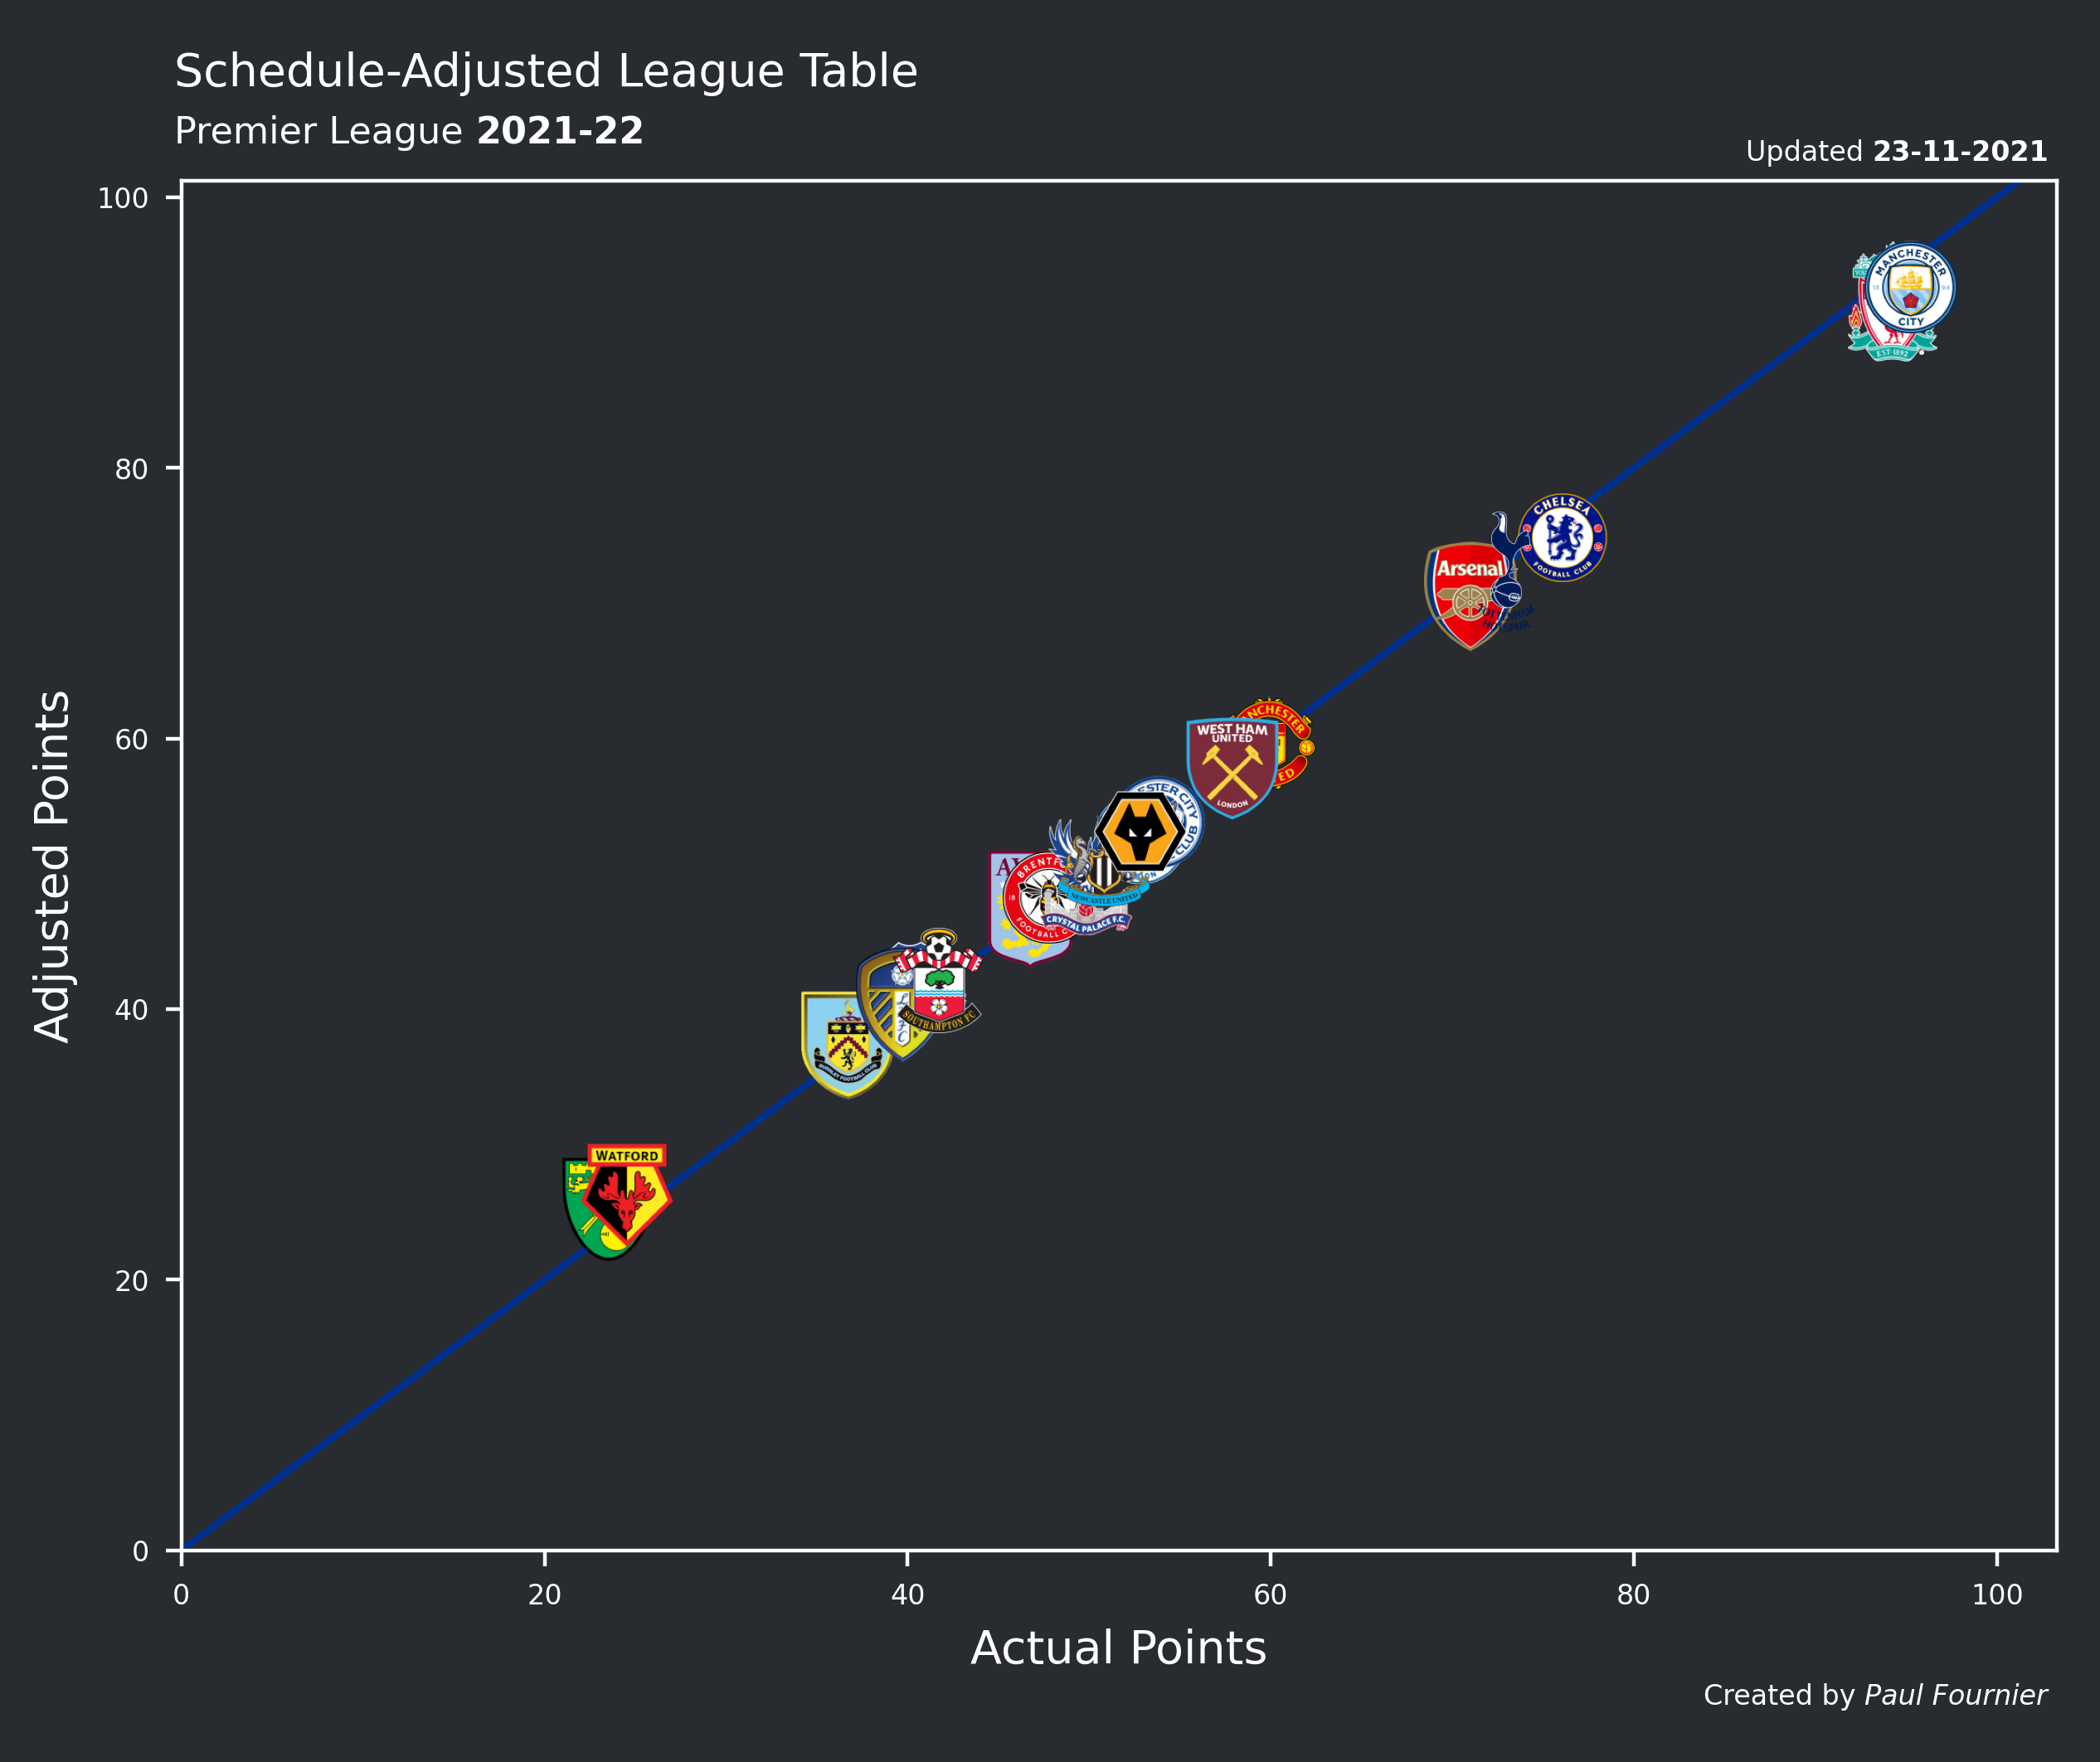

In [15]:
fig, ax = plt.subplots()
fig.set_facecolor(background)
ax.patch.set_alpha(0)

max_adj = league_tables.league_table["adj_points"].max() * 1.1
max_pts = league_tables.league_table["points"].max() * 1.1
ax.set(xlim=(0, max_pts+1), ylim=(0, max_adj+1))

ax.set_xlabel('Actual Points')
ax.set_ylabel('Adjusted Points')
ax.xaxis.label.set_color(text_color)
ax.yaxis.label.set_color(text_color)

ref_line = [0.0, max(max_adj, max_pts)+1]
ax.plot(ref_line, ref_line, color='#003090')

for idx, row in league_tables.league_table.iterrows():
    offset_image(row["points"], row["adj_points"], row["name"], ax)

fig_text(
    x=0.09, y=1.05,
    s="Schedule-Adjusted League Table",
    fontsize=10, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.09, y=1.01,
    s="Premier League <2021-22>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=8, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.83, y=.995,
    s="Updated <23-11-2021>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=6, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.81, y=0.025,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font,
    color=text_color)

plt.tight_layout()
plt.show()

## Expected League Table

The Expected League Table shows the standings of teams using Expected Goals scored and conceded rather than actual goals. Using underlying statistics is meant to look at performance rather than results.


In [16]:
league_tables.xlt()

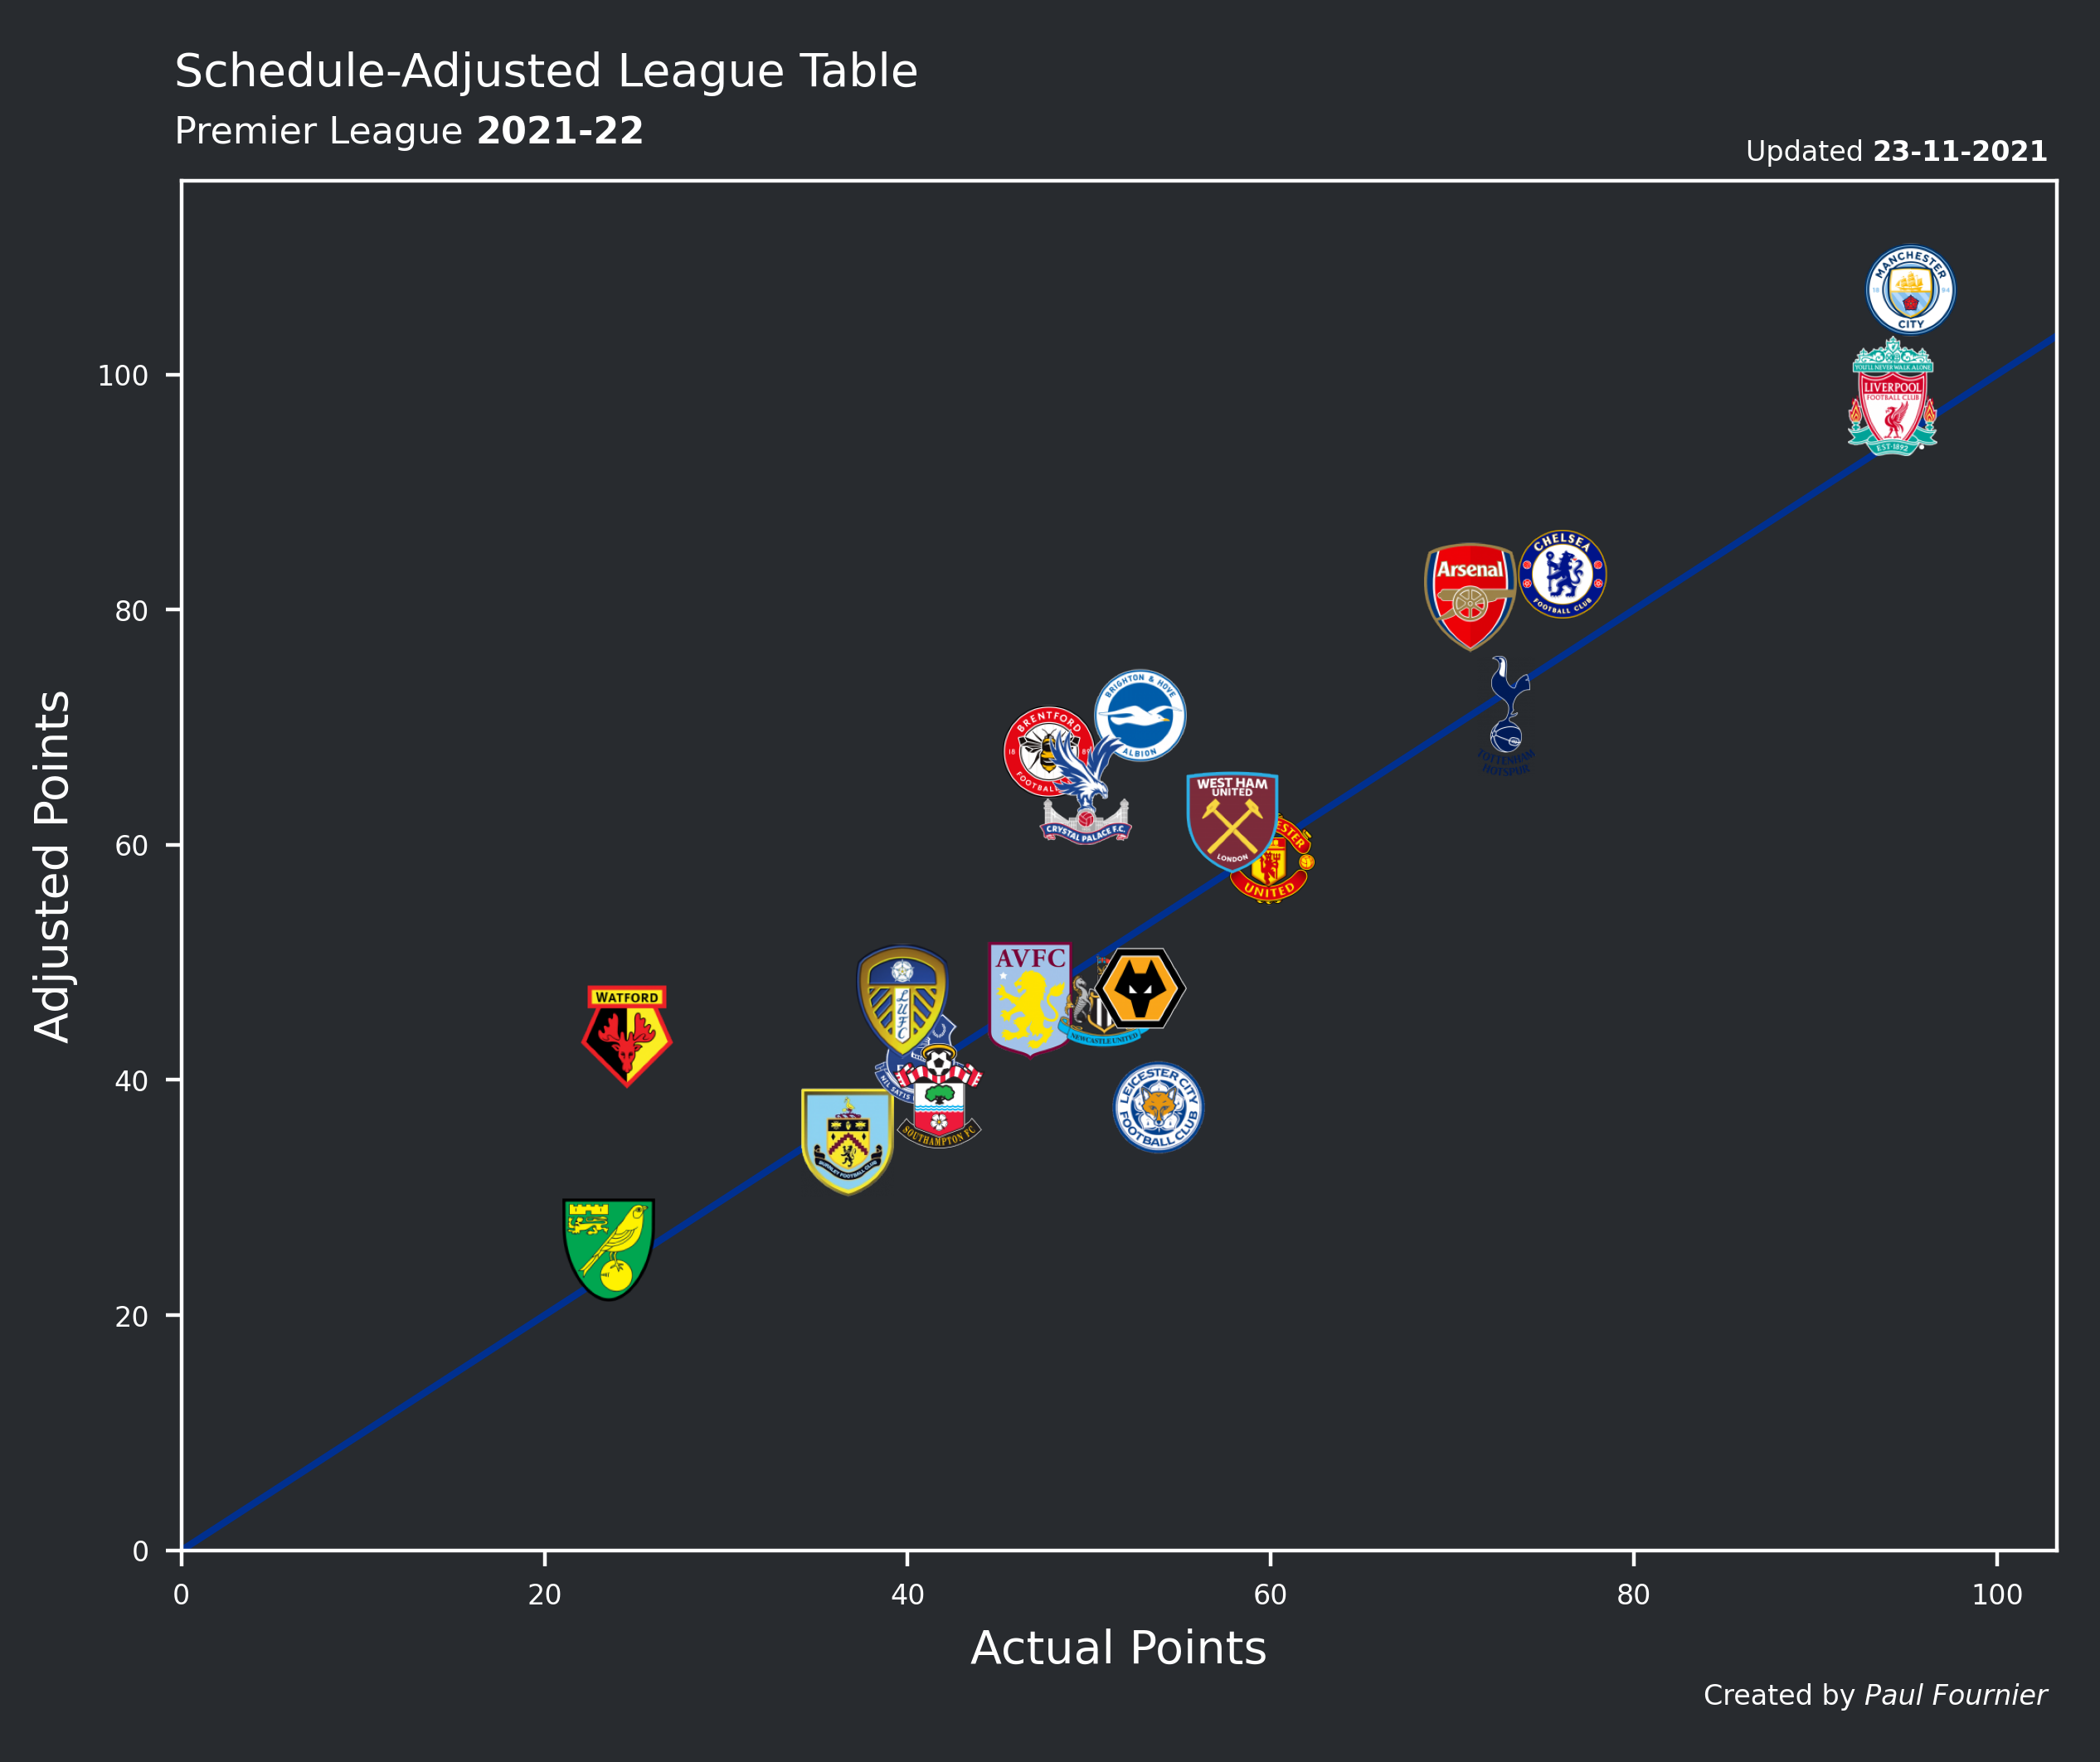

In [18]:
fig, ax = plt.subplots()
fig.set_facecolor(background)
ax.patch.set_alpha(0)

max_adj = league_tables.league_table["xPoints"].max() * 1.1
max_pts = league_tables.league_table["points"].max() * 1.1
ax.set(xlim=(0, max_pts+1), ylim=(0, max_adj+1))

ax.set_xlabel('Actual Points')
ax.set_ylabel('Adjusted Points')
ax.xaxis.label.set_color(text_color)
ax.yaxis.label.set_color(text_color)

ref_line = [0.0, max(max_adj, max_pts)+1]
ax.plot(ref_line, ref_line, color='#003090')

for idx, row in league_tables.league_table.iterrows():
    offset_image(row["points"], row["xPoints"], row["name"], ax)

fig_text(
    x=0.09, y=1.05,
    s="Schedule-Adjusted League Table",
    fontsize=10, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.09, y=1.01,
    s="Premier League <2021-22>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=8, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.83, y=.995,
    s="Updated <23-11-2021>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=6, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.81, y=0.025,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font,
    color=text_color)

plt.tight_layout()
plt.show()